In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tensorflow 2.0.0 Basics Review
## - tf variables
## - tf operations
## - tf keras API

In [41]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
'''
- check tensorflow and keras version
'''
print(f'Tensorflow GPU Version: {tf.__version__}')
print(f'Eager Execution is: {tf.executing_eagerly()}')
print(f'Keras Version: {tf.keras.__version__}')

Tensorflow GPU Version: 2.0.0
Eager Execution is: True
Keras Version: 2.2.4-tf


In [5]:
'''
- check GPU 
'''
var = tf.Variable([3,3])
if tf.test.is_gpu_available():
    print('Running on GPU')
else:
    print('Runing on CPU')

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Running on GPU


['/job:localhost/replica:0/task:0/device:GPU:0']

# tf variables

In [62]:
'''
- Declare variables
'''
var = 56
tf1 = tf.Variable(var, dtype=tf.float32)
tf1.assign(5.6)
tf2 = tf.Variable([[0,4,5],[4,2,7],[7,8,9]])
print('tf1: ',tf1)
print('tf2: ',tf2)
print(f'tf1 iwth Numpy: {tf1.numpy()}')

tf1:  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.6>
tf2:  <tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[0, 4, 5],
       [4, 2, 7],
       [7, 8, 9]], dtype=int32)>
tf1 iwth Numpy: 5.599999904632568


In [72]:
'''
- Declare Constants
'''
constantVar = tf.constant(568, dtype = tf.int16)
print(constantVar)
print(constantVar.numpy())

tf.Tensor(568, shape=(), dtype=int16)
568


In [86]:
'''
- Reshape a tensor
'''
var = tf.Variable([[2,3,4,5],[5,2,9,0],[3,1,2,4]], dtype=tf.float32)
print('var shape:',var.shape)
var1 = tf.reshape(var,(2,6))
print('var1 shape:',var1.shape)
var2 = tf.reshape(var, (1,12))
print('var2 shape:',var2.shape)
var3 = tf.reshape(var, (4,3))
print('var3 shape:',var3.shape)

var shape: (3, 4)
var1 shape: (2, 6)
var2 shape: (1, 12)
var3 shape: (4, 3)


In [43]:
'''
- tensor dimention
- tensor slice
- tensor cast numpy
- tensor slice
- tensor dtype
'''
var = tf.Variable([[[2,3,4,5],[5,2,9,0],[3,1,2,4]],[[0,30,40,50],[5,2,9,0],[3,1,2,4]],[[12,13,14,15],[5,2,9,0],[3,1,2,4]]], dtype=tf.float32)
print('var rank:',tf.rank(var))
var2 = var[0:2]
print('var2 slice:',var2)
print('var2 rank:',tf.rank(var2).numpy())
print('var2 size:',tf.size(var2).numpy())
print('var2 dtype:', var2.dtype)

var rank: tf.Tensor(3, shape=(), dtype=int32)
var2 slice: tf.Tensor(
[[[ 2.  3.  4.  5.]
  [ 5.  2.  9.  0.]
  [ 3.  1.  2.  4.]]

 [[ 0. 30. 40. 50.]
  [ 5.  2.  9.  0.]
  [ 3.  1.  2.  4.]]], shape=(2, 3, 4), dtype=float32)
var2 rank: 3
var2 size: 24
var2 dtype: <dtype: 'float32'>


In [53]:
'''
- tensor element-wise primitive tensor operations
- tensor broadcasting
'''
var1 = tf.Variable([[[2,3,4,5],[5,2,9,0],[3,1,2,4]],[[0,30,40,50],[5,2,9,0],[3,1,2,4]],[[12,13,14,15],[5,2,9,0],[3,1,2,4]]], dtype=tf.float32)
var2 = tf.Variable([[[2,2,2,2],[2,2,2,2],[2,2,2,2]],[[2,2,2,2],[2,2,2,2],[2,2,2,2]],[[2,2,2,2],[2,2,2,2],[2,2,2,2]]], dtype=tf.float32)
var = var1 * var2
print('var tensor:\n',var)
print('\nvar numpy cast:\n',var.numpy())
print('\nvar*4:\n',var*4)

var tensor:
 tf.Tensor(
[[[  4.   6.   8.  10.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[  0.  60.  80. 100.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[ 24.  26.  28.  30.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]], shape=(3, 3, 4), dtype=float32)

var numpy cast:
 [[[  4.   6.   8.  10.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[  0.  60.  80. 100.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[ 24.  26.  28.  30.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]]

var*4:
 tf.Tensor(
[[[ 16.  24.  32.  40.]
  [ 40.  16.  72.   0.]
  [ 24.   8.  16.  32.]]

 [[  0. 240. 320. 400.]
  [ 40.  16.  72.   0.]
  [ 24.   8.  16.  32.]]

 [[ 96. 104. 112. 120.]
  [ 40.  16.  72.   0.]
  [ 24.   8.  16.  32.]]], shape=(3, 3, 4), dtype=float32)


In [68]:
'''
- tensor multiplication
- tensor constant
- tensor constant cast
'''
var1 = tf.constant([[1,2,3],[4,5,3]])
var2 = tf.constant([[1,2,3],[4,5,3]])
var = tf.matmul(var1,tf.transpose(var2))
print('var:\n',var)
var = tf.cast(var, dtype=tf.float32)
print('\nvar dtype:', var.dtype)

var:
 tf.Tensor(
[[14 23]
 [23 50]], shape=(2, 2), dtype=int32)

var dtype: <dtype: 'float32'>


In [88]:
'''
- ragged tensors by constant
- ragged tensors by split_row
'''
ragged_tensor = tf.ragged.constant([[1,2,4],[],[3,4],[1]], dtype=tf.float32, name='ragged_tensor')
print(ragged_tensor)
print(ragged_tensor[0])
print(ragged_tensor[3])
ragged_tensor2 = tf.RaggedTensor.from_row_splits(values=[1,2,4,5,6,7,8], row_splits=[0,3,3,5,6,7])
print(ragged_tensor2)

<tf.RaggedTensor [[1.0, 2.0, 4.0], [], [3.0, 4.0], [1.0]]>
tf.Tensor([1. 2. 4.], shape=(3,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
<tf.RaggedTensor [[1, 2, 4], [], [5, 6], [7], [8]]>


# tf operations

In [106]:
'''
- calculate square differences
'''
t1 = tf.random.normal((3,1))
t2 = tf.random.normal((3,1))
t = tf.math.squared_difference(t1,t2,name='square_difference')
print('_t1:\n',t1)
print('_t2:\n',t2)
print('_t:\n',t)

_t1:
 tf.Tensor(
[[0.23302452]
 [0.33036613]
 [0.07002912]], shape=(3, 1), dtype=float32)
_t2:
 tf.Tensor(
[[-1.1006709 ]
 [-0.40500164]
 [-1.2100329 ]], shape=(3, 1), dtype=float32)
_t:
 tf.Tensor(
[[1.7787435 ]
 [0.54076576]
 [1.638559  ]], shape=(3, 1), dtype=float32)


In [180]:
'''
- calculate tensor mean
'''
var = tf.constant(tf.random.uniform((3,3),minval=0, maxval= 10, dtype=tf.float32))
cross_mean = tf.reduce_mean(var, axis=None)
x_mean = tf.reduce_mean(var, axis=0)
y_mean = tf.reduce_mean(var, axis=1)
x_mean_dim = tf.reduce_mean(var, axis=0,keepdims=True)
y_mean_dim = tf.reduce_mean(var, axis=1, keepdims=True)
print('_var:\n',var)
print('\n_cross_mean:\n',cross_mean)
print('\n_x_mean:\n',x_mean)
print('\n_x_mean_same_dim:\n',x_mean_dim)
print('\n_y_mean:\n',y_mean)
print('\n_y_mean_same_dim:\n',y_mean_dim)

_var:
 tf.Tensor(
[[8.844145   8.424911   5.7227373 ]
 [4.715581   8.562659   7.411667  ]
 [0.57933927 8.567917   4.0922523 ]], shape=(3, 3), dtype=float32)

_cross_mean:
 tf.Tensor(6.324579, shape=(), dtype=float32)

_x_mean:
 tf.Tensor([4.7130218 8.518496  5.7422185], shape=(3,), dtype=float32)

_x_mean_same_dim:
 tf.Tensor([[4.7130218 8.518496  5.7422185]], shape=(1, 3), dtype=float32)

_y_mean:
 tf.Tensor([7.6639304 6.8966355 4.4131694], shape=(3,), dtype=float32)

_y_mean_same_dim:
 tf.Tensor(
[[7.6639304]
 [6.8966355]
 [4.4131694]], shape=(3, 1), dtype=float32)


In [168]:
'''
- tensors with random normal values
'''
tf.random.set_seed(2)
var_random1 = tf.random.normal((4,1),mean=0,stddev=1)
var_random2 = tf.random.normal((4,1),mean=5,stddev=10)
print('_random_var1:\n',var_random1)
print('_random_var2:\n',var_random2)

_random_var1:
 tf.Tensor(
[[ 0.43616885]
 [-1.9093795 ]
 [ 1.3789066 ]
 [-1.0405852 ]], shape=(4, 1), dtype=float32)
_random_var2:
 tf.Tensor(
[[ 4.6377807]
 [14.660629 ]
 [-6.065405 ]
 [ 7.9940577]], shape=(4, 1), dtype=float32)


In [187]:
'''
- tensors with random uniform values
'''
tf.random.set_seed(2)
var1 = tf.random.uniform((4,1),minval=1, maxval=4, dtype=tf.int32)
var2 = tf.random.uniform((4,1),minval=5, maxval=8, dtype=tf.int32)
var_concat_x = tf.concat(values=[var1,var2],axis=0)
var_concat_y = tf.concat(values=[var1,var2],axis=1)
print('_var1:',var1)
print('_var2:',var2)
print('_var_concat_x:',var_concat_x)
print('_var_concat_y:',var_concat_y)

_var1: tf.Tensor(
[[3]
 [1]
 [3]
 [1]], shape=(4, 1), dtype=int32)
_var2: tf.Tensor(
[[7]
 [5]
 [7]
 [7]], shape=(4, 1), dtype=int32)
_var_concat_x: tf.Tensor(
[[3]
 [1]
 [3]
 [1]
 [7]
 [5]
 [7]
 [7]], shape=(8, 1), dtype=int32)
_var_concat_y: tf.Tensor(
[[3 7]
 [1 5]
 [3 7]
 [1 7]], shape=(4, 2), dtype=int32)


In [233]:
'''
- indexing tensor values
- defualt axis=None, it's across cols to search max or min
'''
tf.random.set_seed(1)
var = tf.constant(tf.random.uniform((10,10), minval=-2, maxval=10, dtype=tf.int32))
_max_index_x = tf.argmax(input = var, axis=0, output_type=tf.int32)
_min_index_y = tf.argmin(input = var, axis=1, output_type=tf.int32)
print('_var:\n', var)
print('_max_index_x:\n',_max_index_x.numpy())
print('_min_index_y:\n',_min_index_y.numpy())

_var:
 tf.Tensor(
[[ 4  7  1  3  4  8  8  5  2  0]
 [ 6  4  0  9  4  3 -2  2  5 -1]
 [ 3  4  8  0 -1  5  0  8  4  7]
 [ 8  2  9  7  0  5  7  8  1  2]
 [ 3  1 -1  9 -2  5  2  7 -2  0]
 [ 3  8 -1 -2  8  1  5  7  5  6]
 [ 0  9 -2  3  8  3  4  0  4  0]
 [ 0  9  2  3  8  1  1  3  1  4]
 [-2  5  4  6 -2 -1  0  2  0  7]
 [-2  1  8  6 -2  4  3  6  4  0]], shape=(10, 10), dtype=int32)
_max_index_x:
 [3 6 3 1 5 0 0 2 1 2]
_min_index_y:
 [9 6 4 4 4 3 2 0 0 0]


In [326]:
'''
-?????????????????????//
- Checkpoint to restore and save tensors
- Checkpoint's constructor accepts keyword arguments whose values are types that contain trackable state, such as 
  ~`tf.keras.optimizers.Optimizer` implementations, 
  ~`tf.Variable`, 
  ~`tf.keras.Layer` implementations,
  ~`tf.keras.Model` implementations. 
  It saves these values with a checkpoint and maintains a `save_counter` for numbering checkpoints
'''
var = tf.Variable([[1,2],[3,4]])
checkpoint = tf.train.Checkpoint(var=var)
path = checkpoint.save('./tf_ckpts/')
var = var.assign([[3,3,],[5,5]])
checkpoint.restore(path)

In [343]:
'''
- tf.function(
    func=None, input_signature=None, autograph=True, experimental_implements=None,
    experimental_autograph_options=None, experimental_relax_shapes=False,
    experimental_compile=None
)

'''
def calc(x,y):
    return x**2*5+y
f1 = tf.function(test)
print(f1(2,3))

@tf.function
def calc_2(x,y):
    return x*6+y
print(calc_2(3,4))

tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)


# tf keras modeling

In [344]:
from tensorflow.keras import backend as K

In [353]:
'''
- declare a variable with backend
- Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle low-level operations such as tensor products, convolutions and so on itself. 
- Instead, it relies on a specialized, well optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. Rather than picking one single tensor library and making the 
implementation of Keras tied to that library, Keras handles the problem in a modular way, and several different backend engines can be plugged seamlessly into Keras.
'''
var = K.constant([[1,2],[3,4]],dtype=tf.float16)
var

<tf.Tensor: id=4445, shape=(2, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float16)>

In [40]:
'''
- load minist data
'''
mnist = tf.keras.datasets.mnist
(train_x, train_y),(test_x, test_y)=mnist.load_data()
train_x = train_x.astype('float32')/255
test_x =test_x.astype('float32')/255
train_x = train_x.reshape(train_x.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)

In [52]:
'''
- tf.keras Functional API
'''
ipt = tf.keras.Input(shape=(28,28,1))
opt = tf.keras.layers.Conv2D(32,3)(ipt)
opt = tf.keras.layers.LeakyReLU()(opt)
opt = tf.keras.layers.BatchNormalization()(opt)
opt = tf.keras.layers.MaxPool2D((3,3))(opt)

opt = tf.keras.layers.Conv2D(64,3)(opt)
opt = tf.keras.layers.LeakyReLU()(opt)
opt = tf.keras.layers.BatchNormalization()(opt)
opt = tf.keras.layers.MaxPool2D((3,3))(opt)

opt = tf.keras.layers.Flatten()(opt)
opt = tf.keras.layers.Dense(256, activation='relu')(opt)
opt = tf.keras.layers.Dense(10, activation='softmax')(opt)

model = tf.keras.models.Model(ipt, opt)
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['acc']
)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 6, 6, 64)          0   

In [24]:
model.fit(
    train_x, 
    train_y,
    batch_size = 128,
    epochs = 10,
    validation_data=(test_x,test_y),
)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1646 - acc: 0.9532 - val_loss: 0.2478 - val_acc: 0.9220
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0489 - acc: 0.9844 - val_loss: 0.0399 - val_acc: 0.9858
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0335 - acc: 0.9891 - val_loss: 0.0390 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0295 - acc: 0.9905 - val_loss: 0.0350 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0227 - acc: 0.9929 - val_loss: 0.0549 - val_acc: 0.9819
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0202 - acc: 0.9931 - val_loss: 0.0441 - val_acc: 0.9860
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0162 - acc: 0.9948 - val_loss: 0.

In [360]:
'''
- tf.keras.Model class
- tf.keras.callbacks.Callback class
- tf.keras.callbacks.EarlyStopping class
'''
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32,(3,3), padding='same')
        self.act1 = tf.keras.layers.LeakyReLU()
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.pool1 = tf.keras.layers.MaxPooling2D((3,3))
        
        self.conv2 = tf.keras.layers.Conv2D(32,(3,3), padding='same')
        self.act2 = tf.keras.layers.LeakyReLU()
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.pool2 = tf.keras.layers.MaxPooling2D((3,3))
        
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(512, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.act1(x)
        x = self.bn1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.bn2(x)
        x = self.pool2(x)
        
        
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x
    
class customCallback(tf.keras.callbacks.Callback):
    # constructor
    def __init__(self):
        # parent constructor
        super(customCallback,self).__init__()
        
    # call at the training end    
    def on_epoch_end(self, batch, logs=None):
        print('\n train_acc-val_acc:',logs['acc']-logs['val_acc'])
        print(self.params)

'''
ValAccEarlyStopping Class:
- val_acc_base is to define the expected val_acc at the end of each epoch traning
- if val_acc >= val_acc_base, model will stop training
- if early stopping is not triggered by the end of training, the model with best 
val_acc will be restored
'''
class ValAccEarlyStopping(tf.keras.callbacks.EarlyStopping):
    # constructor
    def __init__(self, val_acc_base):
        # parent constructor
        super(ValAccEarlyStopping,self).__init__(monitor='val_acc', verbose=1, baseline=val_acc_base, restore_best_weights=True)
        # fields
        self.__best_weights=None
        self.__bestWeightEpoch=None
        self.__weights =[]
        self.__val_acc=[]
        
    # early stopping method
    def on_epoch_end(self,epoch,logs=None): 
        # restore best model weights
        if self.restore_best_weights:
            # save weights & val_acc for each epoch
            self.__weights.append(self.model.get_weights())
            self.__val_acc.append(logs['val_acc'])
            
            # update the best weights
            self.__bestWeightEpoch = self.__val_acc.index(max(self.__val_acc))
            self.__best_weights = self.__weights[self.__bestWeightEpoch]           
        
        # early stopping check
        if logs[self.monitor]>=self.baseline:
            self.model.stop_training = True
            self.stopped_epoch = epoch+1
        
    # update early stopping training end method         
    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0 and self.verbose > 0:
            print('Epoch %05d: early stopping' % (self.stopped_epoch + 1))
        else:
            self.model.set_weights(self.__best_weights)
            print(f'Early stopping is not triggered, but best model is restored at epoch {self.__bestWeightEpoch+1}')

In [209]:
'''
- build model 
- compile model
- train model with custom early stopping class
'''
model = MyModel()
model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['acc'],
)
model.fit(
    train_x, 
    train_y,
    batch_size = 128,
    epochs = 10,
    validation_data = (test_x,test_y),
    callbacks = [ValAccEarlyStopping(val_acc_base=0.98)],
    verbose=1,
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1619 - acc: 0.9514 - val_loss: 0.1679 - val_acc: 0.9587
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0498 - acc: 0.9843 - val_loss: 0.0428 - val_acc: 0.9859
Epoch 00003: early stopping


# tf data pipelines

x_train shape:  (60000, 28, 28, 1) , x_train data type:  float32
x_test shape:  (10000, 28, 28, 1) , x_test data type:  float32


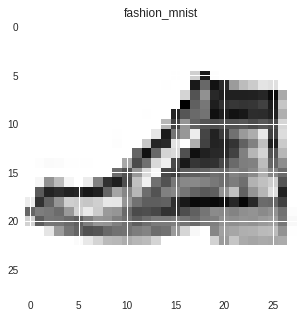

In [6]:
'''
- load fashin_minist dataset
- 10 classes 0-9
'''
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255
print('x_train shape: ',x_train.shape,', x_train data type: ', x_train.dtype)
print('x_test shape: ',x_test.shape,', x_test data type: ',x_test.dtype)
 
plt.figure(figsize=(5,5))
plt.imshow(x_train[258].reshape((28,28)).astype('float32'))
plt.title('fashion_mnist')
plt.show()

In [368]:
'''
- data pipeline from Numpy Arrays
- tf.data.Dataset.from_tensor_slices
'''
batch_size = 128
shuffle_buffer_size = 10000
tf.random.set_seed(5)
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(batch_size).shuffle(shuffle_buffer_size)
train_data = train_data.repeat()
test_data = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size).shuffle(shuffle_buffer_size)
test_data = test_data.repeat()

In [40]:
'''
- data pipline from Numpy with iterator
- tf.data.Dataset.from_tensor_slices
- tf.compat.v1.data.make_one_shot_iteraor
'''
batch_size = 128
shuffle_buffer_size = 10000
tf.random.set_seed(5)
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(batch_size).shuffle(shuffle_buffer_size)
test_data = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size).shuffle(shuffle_buffer_size)
train_iterator = tf.compat.v1.data.make_one_shot_iterator(train_data)
test_iterator = tf.compat.v1.data.make_one_shot_iterator(test_data)

tr_x,tr_y = train_iterator.get_next()
print('x shape:',tr_x.shape)
print('y shape:',tr_y.shape)
te_x,te_y = test_iterator.get_next()
print('x shape:',te_x.shape)
print('y shape:',te_y.shape)

x shape: (128, 28, 28, 1)
y shape: (128,)
x shape: (128, 28, 28, 1)
y shape: (128,)


In [48]:
'''
- data pipline from CSV file 
- tf.data.experimental.make_csv_dataset()
- https://www.tensorflow.org/api_docs/python/tf/data/experimental/make_csv_dataset#args
'''
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_data = pd.read_csv(titanic_file)
titanic_data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [60]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, 
    batch_size=128,
    label_name="survived", 
    select_columns=['age','class', 'fare', 'survived'])
print(titanic_batches)

# for feature_batch, label_batch in titanic_batches.take(1):
#     print("'survived': {}".format(label_batch))
#     print("features:")
#     for key, value in feature_batch.items():
#         print("  {!r:20s}: {}".format(key, value))


https://www.tensorflow.org/tutorials/load_data/csv#train_evaluate_and_predict !!!!!!!!!!!!!!1

<PrefetchDataset shapes: (OrderedDict([(age, (128,)), (fare, (128,)), (class, (128,))]), (128,)), types: (OrderedDict([(age, tf.float32), (fare, tf.float32), (class, tf.string)]), tf.int32)>
'survived': [1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0]
features:
  'age'               : [28.  36.  32.  45.  21.  28.  53.  10.  36.   9.  20.  28.  28.  49.
 34.  30.  29.  11.  30.  70.  48.  30.  32.  28.  28.  23.  65.  43.
 18.   2.  28.  15.  80.  28.  28.  28.  25.  51.  28.  16.  40.5 24.
 28.  44.  33.  18.  28.  47.  57.  48.  61.  32.5 18.  44.  28.  50.
 28.  42.  44.  25.  16.  29.  42.  22.  24.  35.  35.  19.   6.  27.
 36.  33.  28.  24.  28.  28.  28.  28.  19.  40.   2.  24.  28.  28.
 26.  36.  23.  37.  18.  39.  36.  39.  36.  19.  34.  28.  28.  20.
 28.  44.   

In [361]:
'''
- model training with data pipeline
'''
model = MyModel()

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['acc'],
)

model.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = x_train.shape[0]//batch_size,
    validation_data = test_data,
    validation_steps = x_test.shape[0]//batch_size,
    callbacks = [ValAccEarlyStopping(val_acc_base=0.92)],
)

Train for 468 steps, validate for 78 steps
Epoch 1/10
468/468 [==============================] - 5s 10ms/step - loss: 0.4372 - acc: 0.8429 - val_loss: 0.4660 - val_acc: 0.8599
Epoch 2/10
468/468 [==============================] - 4s 10ms/step - loss: 0.2957 - acc: 0.8919 - val_loss: 0.3047 - val_acc: 0.8906
Epoch 3/10
468/468 [==============================] - 5s 10ms/step - loss: 0.2603 - acc: 0.9035 - val_loss: 0.3023 - val_acc: 0.8891
Epoch 4/10
468/468 [==============================] - 4s 9ms/step - loss: 0.2345 - acc: 0.9135 - val_loss: 0.2691 - val_acc: 0.9007
Epoch 5/10
468/468 [==============================] - 4s 9ms/step - loss: 0.2133 - acc: 0.9209 - val_loss: 0.2664 - val_acc: 0.9061
Epoch 6/10
468/468 [==============================] - 5s 10ms/step - loss: 0.1996 - acc: 0.9261 - val_loss: 0.2750 - val_acc: 0.9005
Epoch 7/10
468/468 [==============================] - 4s 9ms/step - loss: 0.1876 - acc: 0.9308 - val_loss: 0.2538 - val_acc: 0.9101
Epoch 8/10
468/468 [=========